In [ ]:
from run_calibrations import get_database
from dotenv import load_dotenv
load_dotenv('.env-db')
from transformers import LlamaTokenizerFast
tokenizer = LlamaTokenizerFast.from_pretrained('hf-internal-testing/llama-tokenizer')
import pandas as pd
def count_tokens(prompt):
    return len(tokenizer.tokenize(prompt))

In [44]:
db = get_database()
coll_name = 'queries/contrast/openchat/openchat_v3.1'
coll = db[coll_name]

In [ ]:
q_set = set()

In [29]:
# Remove duplicates
import tqdm
all_queries = list(coll.find({}))
for q in tqdm.tqdm(all_queries):
    q_ind = f"p{q['prefix_index']}o{q['prompt_index']}s{q['sample_index']}"
    q_set.add(q_ind)
    coll.update_one({'_id': q['_id']}, {'$set': {'query_index': q_ind}})

  2%|▏         | 8639/404748 [08:02<6:08:22, 17.92it/s] 


KeyboardInterrupt: 

In [47]:
# reset hanging ratings
coll_name = 'queries/contrast/openchat/openchat_v3.1'
db[coll_name].update_many({'rating':0}, {'$set':{'rating':-1}})

# get average latency
# latencies = list(db[coll_name].find({"latency":{"$gt":0}}))
# latencies = pd.DataFrame(latencies)
# latencies['latency'].hist(bins=100)
# print(f"Average latency: {sum(latencies)/len(latencies)}")

In [ ]:
db[coll_name].ensureIndex({{'prompt_index', } : 1}, {unique : true, dropDups : true})

<Axes: >

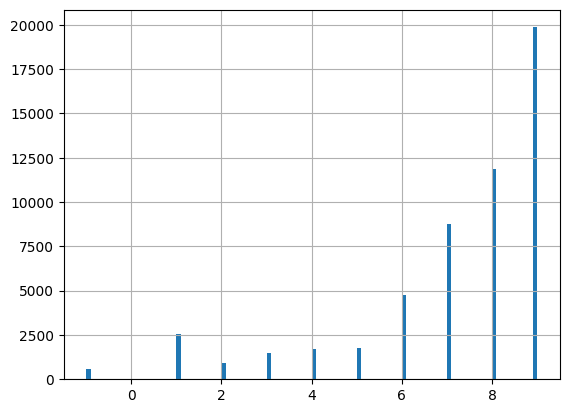

In [15]:
latencies['rating'].hist(bins=100)

In [16]:
latencies[latencies['latency'] > 0.4]

,_id,prefix_index,prompt_index,sample_index,dimension,latency,num_tries,rating
10874,64d9cf962f56523c0bb3beb0,0,18,242,contrast,0.401591,1,9
10875,64d9cf962f56523c0bb3beb1,0,18,243,contrast,0.401604,1,6
10876,64d9cf962f56523c0bb3beb2,0,18,244,contrast,0.401615,1,9
10877,64d9cf962f56523c0bb3beb3,0,18,245,contrast,0.401624,1,8
10878,64d9cf962f56523c0bb3beb4,0,18,246,contrast,0.401632,1,7
...,...,...,...,...,...,...,...,...
54317,64d9d04b2f56523c0bb49cd4,0,114,374,contrast,0.564590,1,9
54318,64d9d04b2f56523c0bb49cd6,0,114,376,contrast,0.564600,1,9
54319,64d9d04b2f56523c0bb49cd8,0,114,378,contrast,0.564609,1,9
54320,64d9d04b2f56523c0bb49cda,0,114,380,contrast,0.564618,1,9


In [ ]:
len(latencies[latencies['rating']>0])

In [ ]:
latencies['prompt_index'].max()

In [ ]:
# import tqdm
# # display dist. of prompt lengths
# dim = 'contrast'
# prefixes = {prefix['prefix_index']:prefix for prefix in list(db['prefixes'].find({}))}
# prompts = {prompt['prompt_index']:prompt for prompt in list(db[f'core_prompts/{dim}'].find({}))}
# samples = {sample['sample_index']:sample for sample in list(db[f'samples/{dim}'].find({}))}
# tokens_dist = []
# prefix = max(prefixes.values(), key=lambda x : len(x['prefix']))
# for prompt in tqdm.tqdm(prompts):
#     for sample in samples:
#         t = count_tokens(prefix['prefix'] + prompts[prompt]['combined_prompt'] + samples[sample]['sample'])
#         tokens_dist.append(t)
pd.Series(tokens_dist).hist(bins=100)

In [ ]:
db[coll_name].find_and_update_many()

In [33]:
import requests
import json
headers = {
        'Content-Type': 'application/json',
    }
data = json.dumps({'n_queries': 1000, 'llm_name': 'contrast'})
response = requests.post('http://localhost:8080/calibrations/get-batch', headers=headers, data=data)

In [39]:
response.json()

{'queries': [], 'collection_name': 'queries/contrast/contrast'}